IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva\M5\FAULT_M5_10


VOLO M5 FAULT 10%

In [3]:
rcou_m5_fault10 = pd.read_csv("RCOU.csv")
rcou_m5_fault10 = rcou_m5_fault10.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m5_fault10 = rcou_m5_fault10[((rcou_m5_fault10['C9'] >= 1400) & (rcou_m5_fault10['C10'] >= 1400) & (rcou_m5_fault10['C11'] >= 1400) & (rcou_m5_fault10['C12'] >= 1400) & (rcou_m5_fault10['C13'] >= 1400) & (rcou_m5_fault10['C14']>= 1400))]

pd.set_option('display.max_rows',700)
display(rcou_m5_fault10)

,TimeUS,C9,C10,C11,C12,C13,C14
308,72731556,1415,1540,1494,1466,1428,1529
310,72752252,1524,1471,1426,1562,1454,1539
311,72762572,1495,1518,1476,1535,1461,1549
312,72772913,1513,1517,1474,1554,1468,1559
313,72785597,1630,1407,1535,1521,1632,1403
...,...,...,...,...,...,...,...
8812,166560430,1481,1468,1533,1409,1435,1511
8814,166580788,1488,1450,1512,1422,1417,1517
8824,166687088,1516,1404,1496,1427,1417,1505
8825,166697172,1513,1409,1500,1424,1418,1505


In [4]:
xkf1_m5_fault10 = pd.read_csv("XKF1_0.csv")
xkf1_m5_fault10 = xkf1_m5_fault10.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m5_fault10 = xkf1_m5_fault10[((xkf1_m5_fault10['TimeUS'] >= 72731556) & (xkf1_m5_fault10['TimeUS'] <= 166708055))]
print(xkf1_m5_fault10)

         TimeUS  Roll  Pitch   Yaw
310    72739678 -0.66   0.65  2.33
311    72750119 -0.61   0.61  2.33
312    72760283 -0.65   0.60  2.34
313    72770308 -0.62   0.57  2.37
314    72783827 -0.51   0.53  2.37
...         ...   ...    ...   ...
8823  166662459  2.32  -2.39  4.03
8824  166674167  2.39  -2.48  4.06
8825  166684744  2.45  -2.54  4.08
8826  166695056  2.50  -2.58  4.10
8827  166705893  2.53  -2.64  4.12

[8518 rows x 4 columns]


In [5]:
att_m5_fault10 = pd.read_csv("ATT.csv")
att_m5_fault10 = att_m5_fault10.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
att_m5_fault10 = att_m5_fault10[((att_m5_fault10['TimeUS'] >= 72731556) & (att_m5_fault10['TimeUS'] <= 166708055))]
print(att_m5_fault10)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw   Yaw
310    72740788    -0.22 -0.66     -0.06   0.65    2.27  2.33
311    72751532    -0.23 -0.61     -0.07   0.61    2.27  2.33
312    72761836    -0.22 -0.65     -0.07   0.60    2.27  2.34
313    72772125    -0.21 -0.62     -0.09   0.57    2.27  2.37
314    72784849    -0.23 -0.51     -0.11   0.53    2.27  2.37
...         ...      ...   ...       ...    ...     ...   ...
8824  166664102     1.16  2.32      0.63  -2.39    5.23  4.03
8825  166675696     1.23  2.39      0.61  -2.48    5.23  4.06
8826  166686245     1.32  2.45      0.59  -2.54    5.22  4.08
8827  166696531     1.40  2.50      0.57  -2.58    5.22  4.10
8828  166707176     1.49  2.53      0.55  -2.64    5.22  4.12

[8519 rows x 7 columns]


In [6]:
att_m5_fault10 = pd.merge_asof(att_m5_fault10,xkf1_m5_fault10, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m5_fault10)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw   Yaw
0      72740788    -0.22 -0.66     -0.06   0.65    2.27  2.33
1      72751532    -0.23 -0.61     -0.07   0.61    2.27  2.33
2      72761836    -0.22 -0.65     -0.07   0.60    2.27  2.34
3      72772125    -0.21 -0.62     -0.09   0.57    2.27  2.37
4      72784849    -0.23 -0.51     -0.11   0.53    2.27  2.37
...         ...      ...   ...       ...    ...     ...   ...
8514  166664102     1.16  2.32      0.63  -2.39    5.23  4.03
8515  166675696     1.23  2.39      0.61  -2.48    5.23  4.06
8516  166686245     1.32  2.45      0.59  -2.54    5.22  4.08
8517  166696531     1.40  2.50      0.57  -2.58    5.22  4.10
8518  166707176     1.49  2.53      0.55  -2.64    5.22  4.12

[8519 rows x 7 columns]


In [7]:
esc_4_m5_fault10 = pd.read_csv("ESC_4.csv")
esc_4_m5_fault10 = esc_4_m5_fault10.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_4_m5_fault10 = esc_4_m5_fault10[((esc_4_m5_fault10['TimeUS'] >= 72731556) & (esc_4_m5_fault10['TimeUS'] <= 166708055))]
print(esc_4_m5_fault10)

        TimeUS   RPM  Curr
25    72738524  3871  3.43
26    72852812  4784  4.11
27    72958256  5629  4.51
28    73064075  6031  3.76
29    73178795  6243  3.52
..         ...   ...   ...
805  166146476  5051  2.45
806  166258232  5167  2.33
807  166369912  5123  2.39
808  166585572  5219  1.89
809  166693906  5004  2.04

[785 rows x 3 columns]


In [8]:
imu_2_m5_fault10 = pd.read_csv("IMU_2.csv")
imu_2_m5_fault10 = imu_2_m5_fault10.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
imu_2_m5_fault10 = imu_2_m5_fault10[((imu_2_m5_fault10['TimeUS'] >= 72731556) & (imu_2_m5_fault10['TimeUS'] <= 166708055))]
print(imu_2_m5_fault10)

          TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
1220    72733710  0.083843 -0.162830 -0.020182 -0.014116  0.469569  -9.803542
1221    72735559  0.075746 -0.020622 -0.011820  0.025653  0.494714 -10.240830
1222    72738257  0.034997  0.151928  0.008776  0.084049  0.456273 -10.297000
1223    72740679  0.003741  0.072724  0.010015  0.144777  0.283807 -10.053230
1224    72744231 -0.037562 -0.080115 -0.006216  0.134844  0.187211 -10.055430
...          ...       ...       ...       ...       ...       ...        ...
33580  166696210  0.099613 -0.053620  0.038292 -0.420899 -0.569941  -9.397790
33581  166699868  0.129239 -0.143168  0.020399 -0.483720 -0.721605  -9.359510
33582  166701893  0.016600 -0.127083  0.028861 -0.537806 -0.754053  -9.493744
33583  166704997 -0.074507 -0.016037  0.054896 -0.576247 -0.765860  -9.600388
33584  166707015  0.025827 -0.012461  0.053776 -0.638200 -0.865410  -9.554013

[32365 rows x 7 columns]


In [9]:
m5_fault10 = pd.merge_asof(att_m5_fault10, imu_2_m5_fault10, on="TimeUS",  tolerance= 100000)
print(m5_fault10)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw   Yaw      GyrX  \
0      72740788    -0.22 -0.66     -0.06   0.65    2.27  2.33  0.003741   
1      72751532    -0.23 -0.61     -0.07   0.61    2.27  2.33  0.075340   
2      72761836    -0.22 -0.65     -0.07   0.60    2.27  2.34  0.158934   
3      72772125    -0.21 -0.62     -0.09   0.57    2.27  2.37  0.050377   
4      72784849    -0.23 -0.51     -0.11   0.53    2.27  2.37  0.260535   
...         ...      ...   ...       ...    ...     ...   ...       ...   
8514  166664102     1.16  2.32      0.63  -2.39    5.23  4.03 -0.041997   
8515  166675696     1.23  2.39      0.61  -2.48    5.23  4.06  0.000253   
8516  166686245     1.32  2.45      0.59  -2.54    5.22  4.08  0.084218   
8517  166696531     1.40  2.50      0.57  -2.58    5.22  4.10  0.099613   
8518  166707176     1.49  2.53      0.55  -2.64    5.22  4.12  0.025827   

          GyrY      GyrZ      AccX      AccY       AccZ  
0     0.072724  0.010015  0.144777  0.283

In [10]:
m5_fault10 = pd.merge_asof(esc_4_m5_fault10, m5_fault10, on="TimeUS",  tolerance= 100000)
m5_fault10 = m5_fault10.dropna()
print(m5_fault10)

        TimeUS   RPM  Curr  DesRoll  Roll  DesPitch  Pitch  DesYaw   Yaw  \
1     72852812  4784  4.11    -0.40 -0.12     -0.20   0.69    2.27  2.61   
2     72958256  5629  4.51    -0.65  0.71     -0.41   0.35    2.27  3.36   
3     73064075  6031  3.76    -1.33  1.87     -0.68  -0.41    2.27  4.49   
4     73178795  6243  3.52    -2.35  1.89     -0.91  -1.09    2.28  6.05   
5     73284676  6108  3.34    -3.54  0.60     -0.88  -1.04    2.28  7.54   
..         ...   ...   ...      ...   ...       ...    ...     ...   ...   
780  166146476  5051  2.45    -0.03 -0.95     -0.11   0.02    5.22  3.49   
781  166258232  5167  2.33    -0.05 -1.40     -0.13  -0.57    5.22  3.49   
782  166369912  5123  2.39     0.10 -0.43      0.09  -1.10    5.22  3.56   
783  166585572  5219  1.89     0.52  2.28      0.69  -2.24    5.23  3.68   
784  166693906  5004  2.04     1.32  2.45      0.59  -2.54    5.22  4.08   

         GyrX      GyrY      GyrZ      AccX      AccY       AccZ  
1    0.074551  0.063

In [11]:
m5_fault10["TimeUS"] = m5_fault10["TimeUS"] - m5_fault10.iloc[0]["TimeUS"]
m5_fault10["TimeUS"] = m5_fault10["TimeUS"].astype(int)
m5_fault10["Guasto"] = 2
print(m5_fault10)

       TimeUS   RPM  Curr  DesRoll  Roll  DesPitch  Pitch  DesYaw   Yaw  \
1           0  4784  4.11    -0.40 -0.12     -0.20   0.69    2.27  2.61   
2      105444  5629  4.51    -0.65  0.71     -0.41   0.35    2.27  3.36   
3      211263  6031  3.76    -1.33  1.87     -0.68  -0.41    2.27  4.49   
4      325983  6243  3.52    -2.35  1.89     -0.91  -1.09    2.28  6.05   
5      431864  6108  3.34    -3.54  0.60     -0.88  -1.04    2.28  7.54   
..        ...   ...   ...      ...   ...       ...    ...     ...   ...   
780  93293664  5051  2.45    -0.03 -0.95     -0.11   0.02    5.22  3.49   
781  93405420  5167  2.33    -0.05 -1.40     -0.13  -0.57    5.22  3.49   
782  93517100  5123  2.39     0.10 -0.43      0.09  -1.10    5.22  3.56   
783  93732760  5219  1.89     0.52  2.28      0.69  -2.24    5.23  3.68   
784  93841094  5004  2.04     1.32  2.45      0.59  -2.54    5.22  4.08   

         GyrX      GyrY      GyrZ      AccX      AccY       AccZ  Guasto  
1    0.074551  0.063259 

In [12]:
path_file = path_file.replace(r"M5\FAULT_M5_10", "")
os.chdir(path_file)
m5_fault10.to_csv('m5_fault10.csv', index=False)
print(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva\


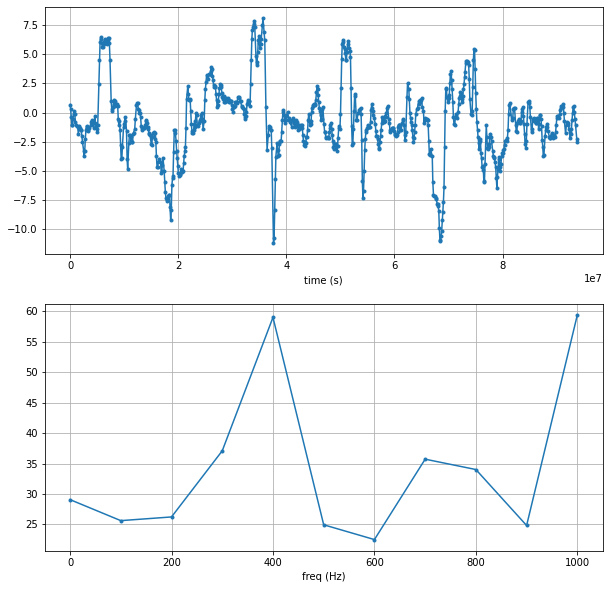

In [13]:
t = m5_fault10["TimeUS"]
y = m5_fault10["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

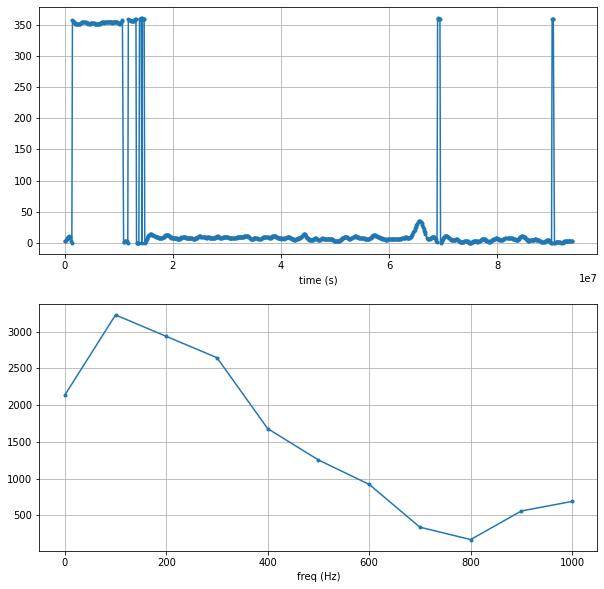

In [14]:
t = m5_fault10["TimeUS"]
y = m5_fault10["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

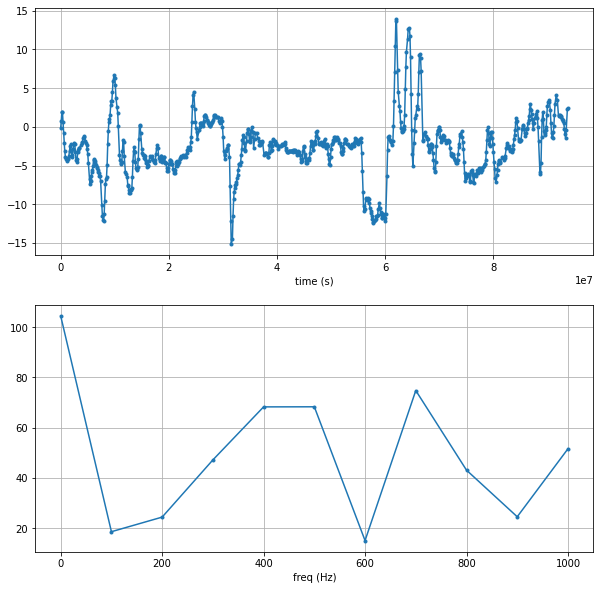

In [15]:
t = m5_fault10["TimeUS"]
y = m5_fault10["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

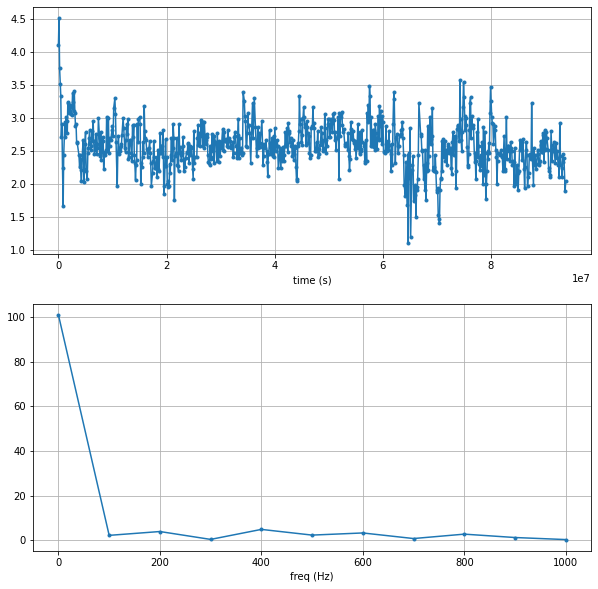

In [16]:
t = m5_fault10["TimeUS"]
y = m5_fault10["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

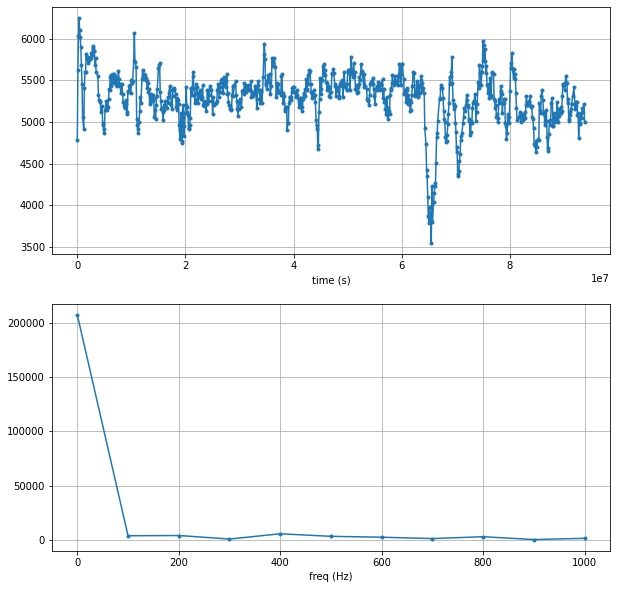

In [17]:
t = m5_fault10["TimeUS"]
y = m5_fault10["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

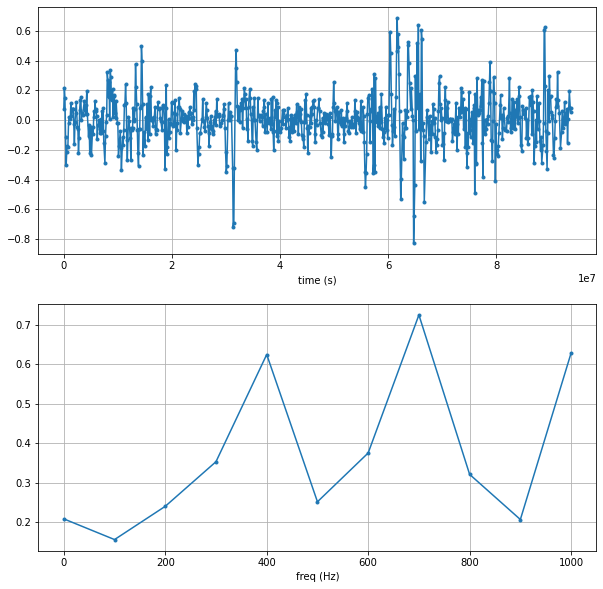

In [18]:
t = m5_fault10["TimeUS"]
y = m5_fault10["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

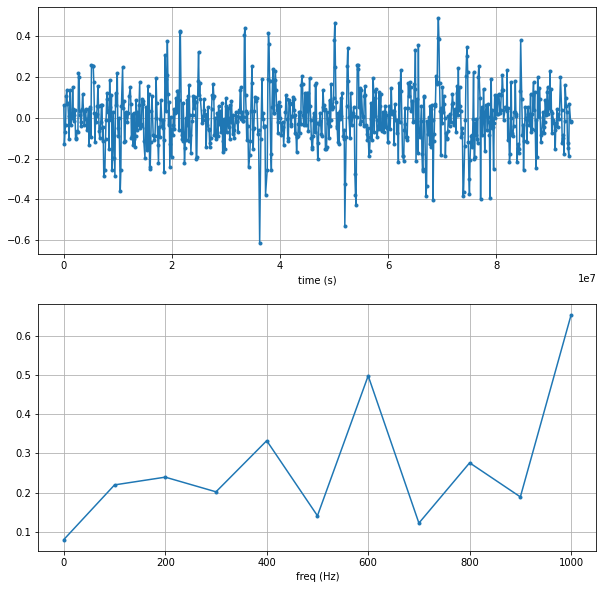

In [19]:
t = m5_fault10["TimeUS"]
y = m5_fault10["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

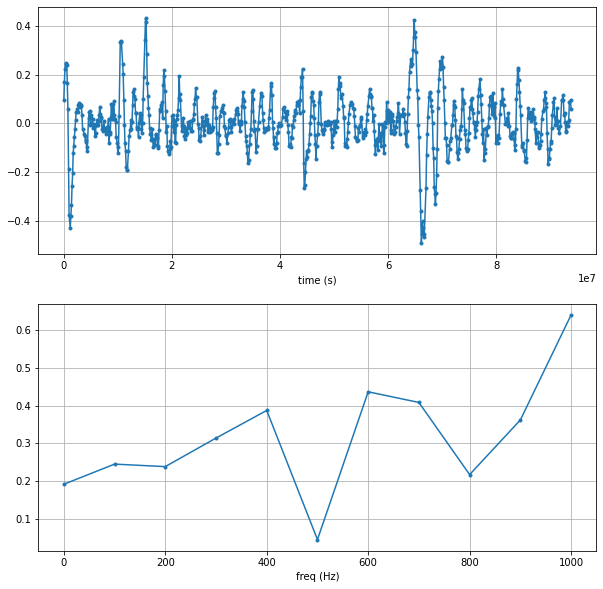

In [20]:
t = m5_fault10["TimeUS"]
y = m5_fault10["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

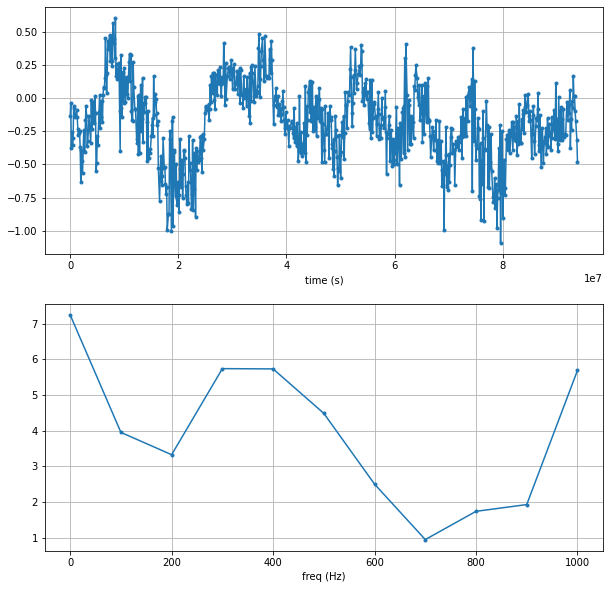

In [21]:
t = m5_fault10["TimeUS"]
y = m5_fault10["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

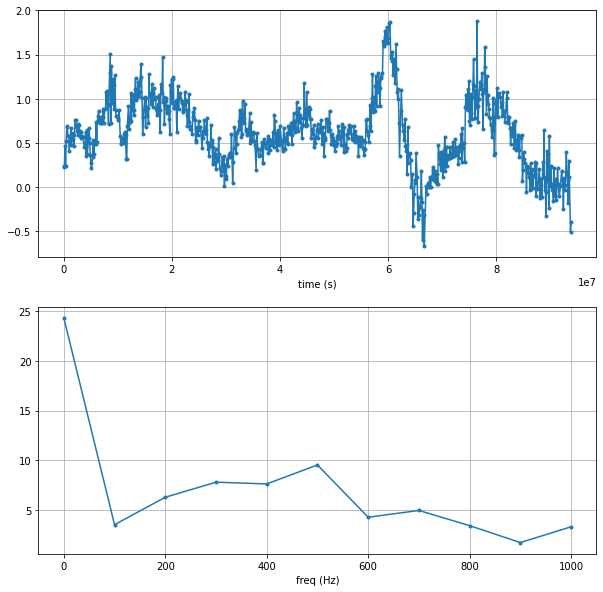

In [22]:
t = m5_fault10["TimeUS"]
y = m5_fault10["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

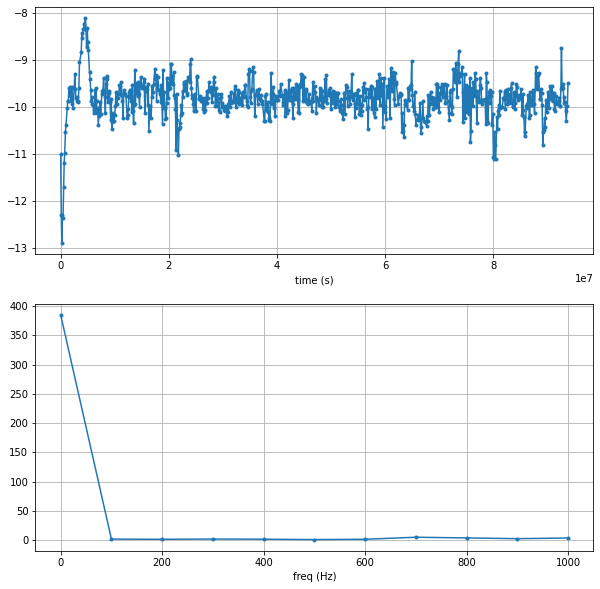

In [23]:
t = m5_fault10["TimeUS"]
y = m5_fault10["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()